In this assignment you need to analyze the dataset of S22 telecom_churn:

Perform EDA on the features in the dataset.
Perform feature transformation if needed.
Analyze all the features in the dataset (numerical and categorical) and decide which are the most predictive ones.
Create a set of models including: LogisticRegression, SVC, DecisionTree, RandomForest and Boosted trees (AdaBoost, GB or XGBoost) and whatever combination of them you consider.
Do model selection on these models and select the best one.
Save the model on disk.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
# data
train = pd.read_csv('telecom_churn_train.csv')
train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CO,140,415,No,No,0,149.700,71,25.450,212.500,97,18.060,245.900,67,11.070,12.600,4,3.400,3,False
1,WA,107,415,No,No,0,230.400,65,39.170,257.400,80,21.880,107.300,88,4.830,8.500,3,2.300,1,False
2,OK,74,415,No,No,0,200.400,87,34.070,309.200,105,26.280,152.100,118,6.840,10.000,2,2.700,1,False
3,NV,3,510,No,Yes,27,67.400,116,11.460,244.000,78,20.740,281.100,93,12.650,11.400,2,3.080,2,False
4,PA,171,415,No,Yes,25,223.200,77,37.940,183.200,118,15.570,150.800,90,6.790,10.200,3,2.750,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,LA,112,510,No,No,0,174.500,127,29.670,259.300,71,22.040,170.500,120,7.670,11.300,7,3.050,1,False
3162,VA,128,415,No,No,0,216.000,111,36.720,153.700,115,13.060,227.000,74,10.220,12.700,4,3.430,1,False
3163,ME,118,408,Yes,Yes,21,156.500,122,26.610,209.200,125,17.780,158.700,81,7.140,11.100,3,3.000,4,True
3164,AL,68,510,No,No,0,157.300,83,26.740,220.900,85,18.780,218.900,129,9.850,12.000,7,3.240,1,False


# Perform EDA on the features in the dataset

In [3]:
# Check the numbers of samples and features
print("train data size: {} ".format(train.shape))

train data size: (3166, 20) 


In [4]:
# Numerical and Categorical variables in the dataset
numerical_vars = []
print('\nNumerical variables:\n')
for c in train.columns:
    if train[c].dtype != 'object':
        print(c, ' : ', train[c].dtype)
        numerical_vars.append(c)

categorical_vars = []
print('\nCategorical variables:\n')
for c in train.columns:
    if train[c].dtype == 'object':
        print(c, ' : ', train[c].dtype)
        categorical_vars.append(c)


Numerical variables:

Account length  :  int64
Area code  :  int64
Number vmail messages  :  int64
Total day minutes  :  float64
Total day calls  :  int64
Total day charge  :  float64
Total eve minutes  :  float64
Total eve calls  :  int64
Total eve charge  :  float64
Total night minutes  :  float64
Total night calls  :  int64
Total night charge  :  float64
Total intl minutes  :  float64
Total intl calls  :  int64
Total intl charge  :  float64
Customer service calls  :  int64
Churn  :  bool

Categorical variables:

State  :  object
International plan  :  object
Voice mail plan  :  object


Area Code is a numerical variable that is actually categorical, so we will be changing it later. Now that we have categorized our variables, let's do an outlier detection.

OUTLIER DETECTION

We can see if our numerical variables present any outliers through the use of boxplots:

<AxesSubplot:ylabel='Account length'>

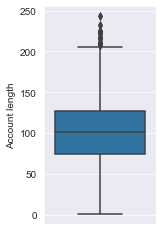

In [5]:
# Boxplots for outlier detection
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Account length'])

<AxesSubplot:ylabel='Number vmail messages'>

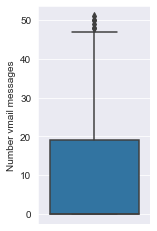

In [6]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Number vmail messages'])

<AxesSubplot:ylabel='Total day minutes'>

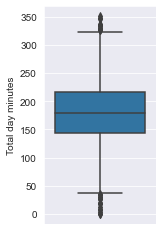

In [7]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total day minutes'])

<AxesSubplot:ylabel='Total day calls'>

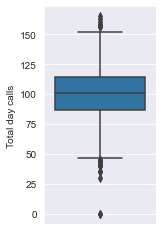

In [8]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total day calls'])

<AxesSubplot:ylabel='Total day charge'>

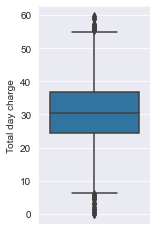

In [9]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total day charge'])

<AxesSubplot:ylabel='Total eve minutes'>

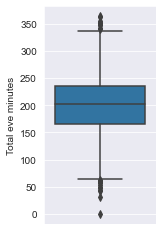

In [10]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total eve minutes'])

<AxesSubplot:ylabel='Total eve calls'>

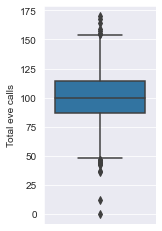

In [11]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total eve calls'])

<AxesSubplot:ylabel='Total eve charge'>

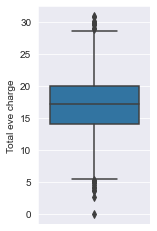

In [12]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total eve charge'])

<AxesSubplot:ylabel='Total night minutes'>

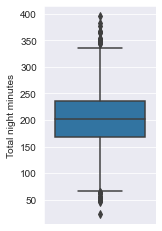

In [13]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total night minutes'])

<AxesSubplot:ylabel='Total night calls'>

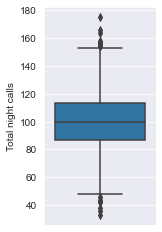

In [14]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total night calls'])

<AxesSubplot:ylabel='Total night charge'>

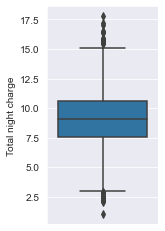

In [15]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total night charge'])

<AxesSubplot:ylabel='Total intl minutes'>

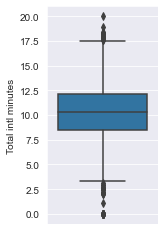

In [16]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total intl minutes'])

<AxesSubplot:ylabel='Total intl calls'>

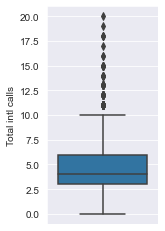

In [17]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total intl calls'])

<AxesSubplot:ylabel='Total intl charge'>

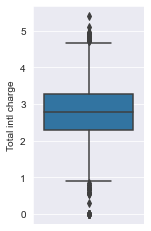

In [18]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Total intl charge'])

<AxesSubplot:ylabel='Customer service calls'>

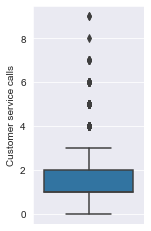

In [19]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=train['Customer service calls'])

We can observe that all of our variables appear to have outliers.

Trimming is the process of removing observations that show outliers in one or more variables in the dataset. There are several methods to set the boundaries beyond which a value can be considered an outlier. 
In this case, we will be determinining the limits using the inter-quartile range proximity rules or by directly setting the limits to the 5th and 95th quantiles.

In [20]:
cols = [
        'Account length', 
        'Number vmail messages',
        'Total day minutes',
        'Total day calls',  
        'Total day charge',  
        'Total eve minutes', 
        'Total eve calls', 
        'Total eve charge', 
        'Total night minutes', 
        'Total night calls', 
        'Total night charge',
        'Total intl minutes',
        'Total intl calls',
        'Total intl charge',
        'Customer service calls']

len(cols)

15

In [21]:
# Outlier Removal

# we create this first function to calculate the boundaries outside which sit the outliers for skewed distributions
def find_boundaries(df, variable, distance):


    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# this second function will go through each of the columns inside our variable cols, identify the boundaries, flag the outliers, and remove them from the dataset
def outlier_removal(train, cols):
    train_trimmed = train
    for col in cols:
        upper_limit, lower_limit = find_boundaries(train_trimmed, col, 3) # we will use a distance of 3 so it will only remove extreme outliers
        outliers = np.where(train_trimmed[col] > upper_limit, True,
                       np.where(train_trimmed[col] < lower_limit, True, False))

        train_trimmed = train_trimmed.loc[~outliers]
    return train_trimmed

In [22]:
data = outlier_removal(train, cols)
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CO,140,415,No,No,0,149.700,71,25.450,212.500,97,18.060,245.900,67,11.070,12.600,4,3.400,3,False
1,WA,107,415,No,No,0,230.400,65,39.170,257.400,80,21.880,107.300,88,4.830,8.500,3,2.300,1,False
2,OK,74,415,No,No,0,200.400,87,34.070,309.200,105,26.280,152.100,118,6.840,10.000,2,2.700,1,False
3,NV,3,510,No,Yes,27,67.400,116,11.460,244.000,78,20.740,281.100,93,12.650,11.400,2,3.080,2,False
4,PA,171,415,No,Yes,25,223.200,77,37.940,183.200,118,15.570,150.800,90,6.790,10.200,3,2.750,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,LA,112,510,No,No,0,174.500,127,29.670,259.300,71,22.040,170.500,120,7.670,11.300,7,3.050,1,False
3162,VA,128,415,No,No,0,216.000,111,36.720,153.700,115,13.060,227.000,74,10.220,12.700,4,3.430,1,False
3163,ME,118,408,Yes,Yes,21,156.500,122,26.610,209.200,125,17.780,158.700,81,7.140,11.100,3,3.000,4,True
3164,AL,68,510,No,No,0,157.300,83,26.740,220.900,85,18.780,218.900,129,9.850,12.000,7,3.240,1,False


<AxesSubplot:ylabel='Account length'>

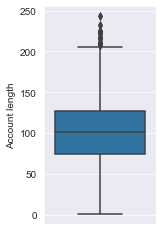

In [23]:
# It appears the outlier removal is complete, but let's plot some of the numerical variables just to be sure
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Account length'])

<AxesSubplot:ylabel='Number vmail messages'>

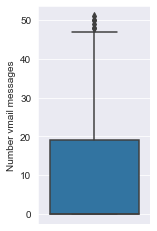

In [24]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Number vmail messages'])

<AxesSubplot:ylabel='Customer service calls'>

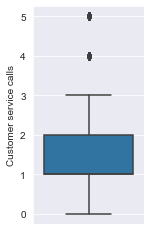

In [25]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=data['Customer service calls'])

Our outlier removal is now complete. We can now move on to the missing value analysis.

MISSING VALUE ANALYSIS:

In [26]:
# check percentage of missing values per feature in data
na_data = (data.isnull().sum() / len(data)) * 100
na_data = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)

# list of variables with a proportion of missing values > 0:
missing_vars = na_data.index.values
missing_types = [data[c].dtype for c in na_data.index]
missing_data = pd.DataFrame({'Missing Ratio': na_data, 'Type': missing_types})
missing_data

,Missing Ratio,Type


Our dataset does not have any missing values, which will definitely save us some work as we do not need to handle any missing data. 
Now, let's transform our area code into a categorical variable, and do the encoding of the rest of categorical variables.

ENCODING

In [27]:
# Transformation of a numerical variable into a categorical variable
data['Area code'] = data['Area code'].astype(str)

In [28]:
# Label encoding of ordinal variables

# let's get our categorical variables once again
for c in data.columns:
    if data[c].dtype == 'object':
        print(c, ' : ', data[c].dtype)

State  :  object
Area code  :  object
International plan  :  object
Voice mail plan  :  object


- State:
    This variable has too many categories to encode, so for simplicity during our analysis it is better to drop this variable    
- Area Code:
    408
    415
    510
    This variable is already encoded
    
- International Plan:
    No
    Yes

- Voice Mail Plan:
    No
    Yes

In [29]:
# we have to do a manual assignment of categories
data = data.replace({'International plan' : {'No' : '0', 'Yes' : '1'}, 'Voice mail plan' : {'No' : '0', 'Yes' : '1'}
                    })       

In [30]:
categorical_vars = []
for c in data.columns:
    if data[c].dtype == 'object':
        categorical_vars.append(c)
        print(c, ':', data[c].unique())

State : ['CO' 'WA' 'OK' 'NV' 'PA' 'HI' 'NJ' 'WV' 'CT' 'KS' 'NY' 'GA' 'IL' 'DC'
 'UT' 'MN' 'MT' 'VT' 'TX' 'OH' 'DE' 'MD' 'AK' 'NM' 'NE' 'TN' 'LA' 'IN'
 'NC' 'IA' 'MS' 'RI' 'WY' 'ME' 'KY' 'MO' 'SD' 'SC' 'WI' 'AZ' 'MI' 'AR'
 'ND' 'VA' 'AL' 'MA' 'OR' 'ID' 'NH' 'CA' 'FL']
Area code : ['415' '510' '408']
International plan : ['0' '1']
Voice mail plan : ['0' '1']


In [31]:
data['International plan'] = data['International plan'].astype(int)
data['Voice mail plan'] = data['Voice mail plan'].astype(int)
data['Area code'] = data['Area code'].astype(int)

To end our EDA, we can build some new features through the combination of existing features (interactions), in order to simplify further analysis

INTERACTIONS

In [32]:
# Total number of national minutes
data['Total Minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes']
# Total number of national calls
data['Total Calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls']
# Total number of charges
data['Total Charges'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [33]:
features_to_remove = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 
                      'Total day calls', 'Total eve calls','Total night calls',
                      'Total day charge', 'Total eve charge', 'Total night charge', 'State']

data.drop(features_to_remove, axis=1, inplace=True)
data

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Minutes,Total Calls,Total Charges
0,140,415,0,0,0,12.600,4,3.400,3,False,608.100,235,54.580
1,107,415,0,0,0,8.500,3,2.300,1,False,595.100,233,65.880
2,74,415,0,0,0,10.000,2,2.700,1,False,661.700,310,67.190
3,3,510,0,1,27,11.400,2,3.080,2,False,592.500,287,44.850
4,171,415,0,1,25,10.200,3,2.750,3,False,557.200,285,60.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,112,510,0,0,0,11.300,7,3.050,1,False,604.300,318,59.380
3162,128,415,0,0,0,12.700,4,3.430,1,False,596.700,300,60.000
3163,118,408,1,1,21,11.100,3,3.000,4,True,524.400,328,51.530
3164,68,510,0,0,0,12.000,7,3.240,1,False,597.100,297,55.370


# Perform feature transformation if needed.
Here we check the skewness of numerical features excluding cardinal variables (with just information about number of items). We then deal with extreme values before applying Box-Cox transformation later.

In [34]:
for c in data.columns:
    print(c)

Account length
Area code
International plan
Voice mail plan
Number vmail messages
Total intl minutes
Total intl calls
Total intl charge
Customer service calls
Churn
Total Minutes
Total Calls
Total Charges


In [35]:
# We can observe only one of our variables does not give information about number of items: 

var = ['Account length']

# Check the skew of numerical features
feat_skew = data[var].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' : feat_skew})
skewness#.head(10)


Skew in numerical features: 



,Skew
Account length,0.088


['Account length']

Account length
105   1.313
87    1.281
101   1.217
90    1.217
86    1.153
127   1.121
112   1.089
93    1.089
123   1.089
107   1.089
Name: Account length, dtype: float64

 mu = 100.92 and sigma = 39.82



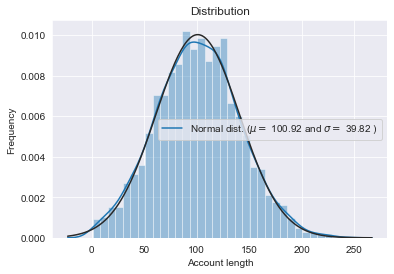

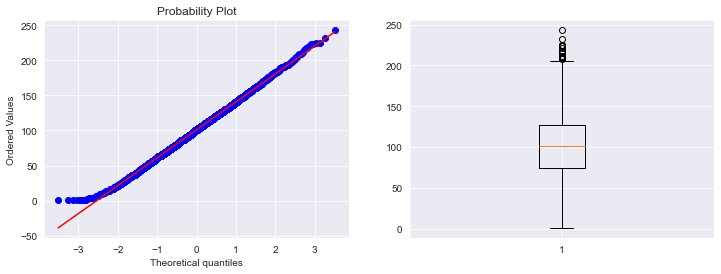

In [36]:
skewed_features = skewness[abs(skewness > 0.75)].index
print(skewed_features.values)
print()

for feat in skewed_features:

    print(feat)
    pp = data[feat].value_counts()/data.shape[0]*100.
    print(pp[:10, ])
    
    sns.distplot(data[feat], fit=norm);
    (mu, sigma) = norm.fit(data[feat])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution')

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    res = stats.probplot(data[feat], plot=axs[0])
    axs[1] = plt.boxplot(data[feat])
    plt.show()

We can observe that this variable is very close to a normal distribution, so no transformations are needed.

# Create a set of models including: LogisticRegression, SVC, DecisionTree, RandomForest and Boosted trees (AdaBoost, GB or XGBoost) and whatever combination of them you consider.

Now that our dataset is clean, we can start making some predictions. Once we have these models made we can check what are the variables that affect our predictions the most

In [37]:
# Let's do a recap
numerical_vars = []
print('\nNumerical variables:\n')
for c in data.columns:
    if data[c].dtype != 'object':
        print(c, ' : ', data[c].dtype)
        numerical_vars.append(c)

categorical_vars = []
print('\nCategorical variables:\n')
for c in data.columns:
    if data[c].dtype == 'object':
        print(c, ' : ', data[c].dtype)
        categorical_vars.append(c)


Numerical variables:

Account length  :  int64
Area code  :  int32
International plan  :  int32
Voice mail plan  :  int32
Number vmail messages  :  int64
Total intl minutes  :  float64
Total intl calls  :  int64
Total intl charge  :  float64
Customer service calls  :  int64
Churn  :  bool
Total Minutes  :  float64
Total Calls  :  int64
Total Charges  :  float64

Categorical variables:



In [38]:
X = data.drop(labels ='Churn', axis = 1).values
y = data.Churn.values
X.shape

(3123, 12)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.20)
X_train.shape

(2498, 12)

In [40]:
# we separate the input variable names by excluding the target
features = [x for x in data if x != 'Churn']
features

['Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Total Minutes',
 'Total Calls',
 'Total Charges']

We can now create our first model: 
1. Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

Let's try to find the best regularization coefficient, which is the coefficient C for logistic regression. Then, we will have an optimal model that is not overfit and is a good predictor of the target variable.

In [42]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
gridsearch = GridSearchCV(lr, parameters, scoring = 'roc_auc', cv = skf)
gridsearch = gridsearch.fit(X_train, y_train)
gridsearch.best_estimator_

LogisticRegression(C=1)

Let's use this coefficient for our regression 

In [43]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1)
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, y_pred)
lr_score

0.8592

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[530,   4],
       [ 84,   7]], dtype=int64)

Our logistic model looks quite accurate. Let's see what the most predictive variables are

In [45]:
pd.DataFrame({'feat': features,
              'coef': lr.coef_.flatten().tolist()}).sort_values(by = 'coef', ascending = False)

,feat,coef
8,Customer service calls,0.467
2,International plan,0.235
11,Total Charges,0.074
0,Account length,-0.000
9,Total Minutes,-0.002
7,Total intl charge,-0.003
10,Total Calls,-0.005
1,Area code,-0.008
5,Total intl minutes,-0.010
3,Voice mail plan,-0.023


MOST PREDICTIVE FEATURES OF OUR MODEL:
The list indicates that the customer service callas, and whether the customer has or not an international plan, are the two most predictive features for the dataset. Let's keep doing some more models.

2. SVC
Support Vector Classifications

In [46]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, y_pred)
print(svc_score)

0.8544


Our accuracy score is not bad, but let's see if we can improve it with a standard scaler

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc = svc.fit(X_train, y_train)

In [49]:
y_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, y_pred)
print(svc_score)

0.9088


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[522,  12],
       [ 45,  46]], dtype=int64)

3. Decision Tree

There are two types of decision trees: Classifiers and Regressors

Decision Tree Classifiers are used to solve classification problems. For example, they are predicting if a person will have their loan approved.
Decision Tree Regressor are used to solve regression problems. For example, prediction of how many people will die because of an overdose.

Since we are predicting if a customer will stay or not, we will be using a classifier.

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_score = accuracy_score(y_test, y_pred)
print(dt_score)

0.9296


In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[510,  24],
       [ 20,  71]], dtype=int64)

4. Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500, 
    max_leaf_nodes=16, 
    random_state=42)

rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
rf_score

0.9632

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[533,   1],
       [ 22,  69]], dtype=int64)

5. Boosted trees (AdaBoost, GB or XGBoost) 
and whatever combination of them you consider

5.1 Adaptive Boost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=42)

ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [56]:
y_pred = ada.predict(X_test)
ada_score = accuracy_score(y_test, y_pred)
ada_score

0.8976

In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[520,  14],
       [ 50,  41]], dtype=int64)

5.2 Gradient Boosting Machine

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=1, n_estimators=200,
    learning_rate=0.5, random_state=42)

gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=200,
                           random_state=42)

In [59]:
y_pred = gb.predict(X_test)
gb_score = accuracy_score(y_test, y_pred)
gb_score

0.9152

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[520,  14],
       [ 39,  52]], dtype=int64)

# Model Selection: Which model is best?
To see which of our model is better, we can stack all of our classifiers and compare them.

In [61]:
#!pip install mlxtend

In [62]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score

#base models
estimators=[('lr', lr), ('svc', svc), ('dt', dt), ('rf', rf), ('ada', ada), ('gb', gb)]

# meta learner
lr = LogisticRegression(C=1)

sclf = StackingCVClassifier(classifiers=[cls for _, cls in estimators], meta_classifier=lr)

print('5-fold cross validation:\n')

for label, clf in estimators:

    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.86 (+/- 0.00) [lr]
Accuracy: 0.93 (+/- 0.01) [svc]
Accuracy: 0.95 (+/- 0.00) [dt]
Accuracy: 0.96 (+/- 0.01) [rf]
Accuracy: 0.91 (+/- 0.01) [ada]
Accuracy: 0.92 (+/- 0.01) [gb]


We can conclude that the random forest is the best model for our dataset.

# Best Variable Estimators in our best model

In [63]:
pd.DataFrame({'feat': features,
              'coef': rf.feature_importances_}).sort_values(by='coef', ascending = False)

,feat,coef
11,Total Charges,0.361
9,Total Minutes,0.144
8,Customer service calls,0.129
2,International plan,0.111
6,Total intl calls,0.060
3,Voice mail plan,0.050
4,Number vmail messages,0.049
7,Total intl charge,0.036
5,Total intl minutes,0.035
0,Account length,0.013


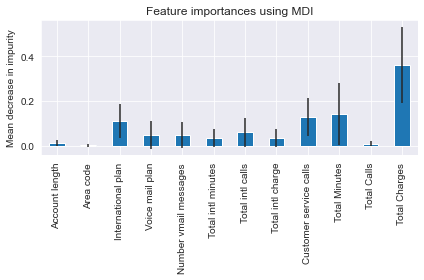

In [64]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Here we can observe what are the most important variables inside our selected model. We can see that the coefficients are quite different than those from our initial logistic regression.

# Save the model on disk.
After training our scikit-learn model, we will save it on the disk by  

In [65]:
import pickle
s = pickle.dumps(rf)

In [66]:
Natalia_Caceres = pickle.loads(s)
Natalia_Caceres

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [68]:
import pickle

data = rf
file = open("Natalia_Caceres","wb")

pickle.dump(data,file)
file.close()

In [549]:
# We can try out our model with a random test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.20) # by changing the random_state, we gest different test sets
y_pred = Natalia_Caceres.predict(X_test)
accuracy_score(y_test, y_pred)

0.9648